In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


In [2]:
df = pd.read_csv('pd_speech_features.csv',header=1)

In [3]:
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [5]:
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [6]:
int_columns = df.select_dtypes(include=[np.int]).columns

<ipython-input-6-13d32b8c9100>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  int_columns = df.select_dtypes(include=[np.int]).columns


In [7]:
int_columns

Index(['id', 'gender', 'numPulses', 'numPeriodsPulses',
       'app_entropy_shannon_10_coef', 'class'],
      dtype='object')

In [8]:
X=df.drop(['class','id'],axis = 1)
y = df['class']

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_smote, y_smote = smote.fit_resample(X, y)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in split.split(X, y):
  X_train= X.loc[train_index]
  y_train = y.loc[train_index]
  X_test = X.loc[test_index]
  y_test =y.loc[test_index]

In [11]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(X_smote, y_smote):
  X_sm= X_smote.loc[train_index]
  y_sm = y_smote.loc[train_index]
  X_test_sm = X_smote.loc[test_index]
  y_test_sm =y_smote.loc[test_index]

In [12]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [13]:
X_sm_std = pd.DataFrame(std.fit_transform(X_sm),columns = X_train.columns)
X_test_std_sm = pd.DataFrame(std.transform(X_test_sm),columns = X_test.columns)

In [14]:
std2=StandardScaler()
X_std= pd.DataFrame(std2.fit_transform(X_train),columns = X_train.columns)
X_test_std = pd.DataFrame(std2.transform(X_test),columns = X_test.columns)

# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [19]:
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)
DF = DecisionTreeClassifier( random_state = 42)
params_grid=[{'criterion' : ['gini','entropy'],'min_samples_leaf':[1,3,5],
              'max_depth':[None,25,50,100]
              ,'min_samples_split':[2,8,10],
              'max_features':[600,650,None,]}]

In [ ]:
DF_GS =GridSearchCV (DF,params_grid,cv = cv,scoring =['f1','precision','recall','accuracy'],return_train_score = True,refit = 'accuracy')

In [ ]:
DF_GS.fit(X_train,y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=42),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 25, 50, 100],
                          'max_features': [600, 650, None],
                          'min_samples_leaf': [1, 3, 5],
                          'min_samples_split': [2, 8, 10]}],
             refit='accuracy', return_train_score=True,
             scoring=['f1', 'precision', 'recall', 'accuracy'])

In [ ]:
DF_GS.best_score_

0.8272058823529411

In [ ]:
DF_GS.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 600,
 'min_samples_leaf': 1,
 'min_samples_split': 8}

In [ ]:
DF2 = DecisionTreeClassifier(random_state = 42)
DF2_GS =GridSearchCV (DF2,params_grid,cv = cv,scoring =['f1','precision','recall','accuracy'],return_train_score = True,refit = 'accuracy')

In [ ]:
DF2_GS.fit(X_smote,y_smote)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=42),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 25, 50, 100],
                          'max_features': [600, 650, None],
                          'min_samples_leaf': [1, 3, 5],
                          'min_samples_split': [2, 8, 10]}],
             refit='accuracy', return_train_score=True,
             scoring=['f1', 'precision', 'recall', 'accuracy'])

In [ ]:
DF2_GS.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [ ]:
DF2_GS.best_score_

0.8710245821042282

In [ ]:
scores = ['mean_test_accuracy','mean_test_recall','mean_test_f1','mean_test_precision']
for i in scores:
  print(i)
  print(DF2_GS.cv_results_[i][DF2_GS.best_index_])

mean_test_accuracy
0.8710245821042282
mean_test_recall
0.8625971297742453
mean_test_f1
0.870519749450013
mean_test_precision
0.8792659800790874


In [ ]:
scores = ['mean_test_accuracy','mean_test_recall','mean_test_f1','mean_test_precision']
for i in scores:
  print(i)
  print(DF_GS.cv_results_[i][DF2_GS.best_index_])

mean_test_accuracy
0.8088235294117647
mean_test_recall
0.8776029390545048
mean_test_f1
0.8719855755360383
mean_test_precision
0.868554803744708


In [34]:
from sklearn.metrics import  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

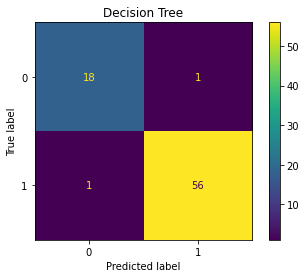

In [57]:
ConfusionMatrixDisplay.from_predictions(y_test,DF2_GS.best_estimator_.predict(X_test))
plt.title("Decision Tree")
plt.show()

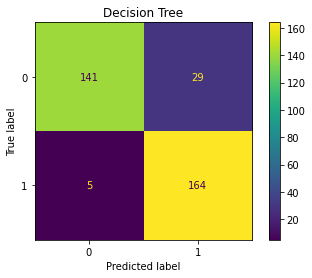

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test_sm,DF2_GS.best_estimator_.predict(X_test_sm))
plt.title("Decision Tree")
plt.show()

In [58]:
y_predicted =DF_GS.best_estimator_.predict(X_test)
print('accuracy:')
print(accuracy_score(y_test,y_predicted))
print('precision')
print(precision_score(y_test,y_predicted))
print('recall')
print(recall_score(y_test,y_predicted))
print('f')
print(f1_score(y_test,y_predicted))

accuracy:
0.8026315789473685
precision
0.8888888888888888
recall
0.8421052631578947
f
0.8648648648648649


In [60]:
y_predicted =DF2_GS.best_estimator_.predict(X_test)
print('accuracy:')
print(accuracy_score(y_test,y_predicted))
print('precision')
print(precision_score(y_test,y_predicted))
print('recall')
print(recall_score(y_test,y_predicted))
print('f')
print(f1_score(y_test,y_predicted))

accuracy:
0.9736842105263158
precision
0.9824561403508771
recall
0.9824561403508771
f
0.9824561403508771


# Random forest 


In [55]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=1,n_estimators = 10)
params_grid=[{'criterion':['gini','entropy'],'min_samples_leaf':[1,10,20],
              'max_depth':[None,60,70]
              ,'min_samples_split':[2,8,10,12],
              'max_features':[650,660,675,None,]}]

In [ ]:
RF_GS =GridSearchCV (RF,params_grid,cv = cv,scoring =['accuracy','precision','recall','f1'],refit='accuracy')

In [ ]:
RF_GS.fit(X_train,y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=42),
             estimator=RandomForestClassifier(n_estimators=10, random_state=1),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 60, 70],
                          'max_features': [650, 660, 675, None],
                          'min_samples_leaf': [1, 10, 20],
                          'min_samples_split': [2, 8, 10, 12]}],
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
RF_GS.best_score_

0.8661764705882353

In [ ]:
RF_GS.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 8}

In [ ]:
RF2 = RandomForestClassifier(random_state=42,n_estimators = 10)
RF2_GS =GridSearchCV (RF,params_grid,cv = cv,scoring =['accuracy','precision','recall','f1'],refit='accuracy')

In [ ]:
RF2_GS.fit(X_smote,y_smote)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=42),
             estimator=RandomForestClassifier(n_estimators=10, random_state=1),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 60, 70],
                          'max_features': [650, 660, 675, None],
                          'min_samples_leaf': [1, 10, 20],
                          'min_samples_split': [2, 8, 10, 12]}],
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
RF2_GS.best_score_

0.9211012782694199

In [ ]:
RF2_GS.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 650,
 'min_samples_leaf': 1,
 'min_samples_split': 8}

In [ ]:
for i in scores:
  print(i)
  print(RF2_GS.cv_results_[i][RF2_GS.best_index_])

mean_test_accuracy
0.9211012782694199
mean_test_recall
0.890366688657466
mean_test_f1
0.9186635116887523
mean_test_precision
0.9490656344059163


In [ ]:
for i in scores:
  print(i)
  print(RF2_GS.cv_results_[i][RF2_GS.best_index_])

mean_test_accuracy
0.9211012782694199
mean_test_recall
0.890366688657466
mean_test_f1
0.9186635116887523
mean_test_precision
0.9490656344059163


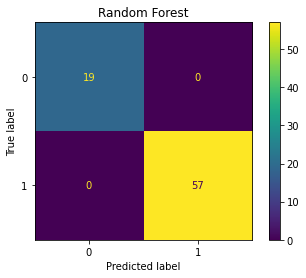

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,RF2_GS.best_estimator_.predict(X_test))
plt.title("Random Forest")
plt.show()

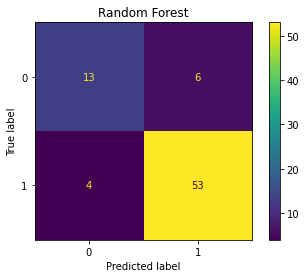

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test,RF_GS.best_estimator_.predict(X_test))
plt.title("Random Forest")
plt.show()

In [64]:
y_predicted =RF_GS.best_estimator_.predict(X_test)
print('accuracy:')
print(accuracy_score(y_test,y_predicted))
print('precision')
print(precision_score(y_test,y_predicted))
print('recall')
print(recall_score(y_test,y_predicted))
print('f')
print(f1_score(y_test,y_predicted))

accuracy:
0.868421052631579
precision
0.8983050847457628
recall
0.9298245614035088
f
0.9137931034482759


In [66]:
y_predicted =RF2_GS.best_estimator_.predict(X_test)
print('accuracy:')
print(accuracy_score(y_test,y_predicted))
print('precision')
print(precision_score(y_test,y_predicted))
print('recall')
print(recall_score(y_test,y_predicted))
print('f')
print(f1_score(y_test,y_predicted))

accuracy:
1.0
precision
1.0
recall
1.0
f
1.0


# MLP


In [26]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(batch_size=32,learning_rate='invscaling',learning_rate_init=0.01,max_iter = 1000)

In [27]:
params_grid =[{'hidden_layer_sizes':[(100,),(40,50,),(20,30,),(40,)],
               'activation':['relu','tanh'],
               'solver':['sgd','adam'],
               'alpha':[0.0001,0.001,0.01], 
}]

In [28]:
mlp_GS =GridSearchCV (mlp,params_grid,cv = cv,scoring =['accuracy','precision','recall','f1'],refit='accuracy')

In [ ]:
mlp_GS.fit(X_sm_std,y_sm)

In [30]:
mlp_GS.best_score_

0.9417116826574216

In [31]:
mlp_GS.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (40, 50),
 'solver': 'adam'}

In [32]:
scores = ['mean_test_accuracy','mean_test_recall','mean_test_f1','mean_test_precision']
for i in scores:
  print(i)
  print(mlp_GS.cv_results_[i][mlp_GS.best_index_])

mean_test_accuracy
0.9417116826574216
mean_test_recall
0.9266865129467051
mean_test_f1
0.9398212546780396
mean_test_precision
0.9540795497826648


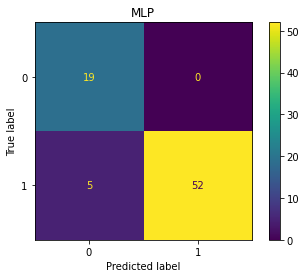

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test,mlp_GS.best_estimator_.predict(X_test_std))
plt.title("MLP")
plt.show()

In [36]:
y_predicted = mlp_GS.best_estimator_.predict(X_test_std)
print('accuracy:')
print(accuracy_score(y_test,y_predicted))
print('precision')
print(precision_score(y_test,y_predicted))
print('recall')
print(recall_score(y_test,y_predicted))
print('f')
print(f1_score(y_test,y_predicted))

accuracy:
0.9342105263157895
precision
1.0
recall
0.9122807017543859
f
0.9541284403669724


In [37]:
params_grid =[{'hidden_layer_sizes':[(80,),(30,40,),(10,20,),(40,)],
               'activation':['relu','tanh'],
               'solver':['sgd','adam'],
               'alpha':[0.0001,0.001,0.01], 
}]
mlp2 = MLPClassifier(batch_size=32,learning_rate='invscaling',learning_rate_init=0.01,max_iter = 1000)
mlp2_GS =GridSearchCV (mlp2,params_grid,cv = cv,scoring =['accuracy','precision','recall','f1'],refit='accuracy')

In [38]:
mlp2_GS.fit(X_std,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=42),
             estimator=MLPClassifier(batch_size=32, learning_rate='invscaling',
                                     learning_rate_init=0.01, max_iter=1000),
             param_grid=[{'activation': ['relu', 'tanh'],
                          'alpha': [0.0001, 0.001, 0.01],
                          'hidden_layer_sizes': [(80,), (30, 40), (10, 20),
                                                 (40,)],
                          'solver': ['sgd', 'adam']}],
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [39]:
mlp2_GS.best_score_

0.8801470588235294

In [40]:
mlp2_GS.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (30, 40),
 'solver': 'adam'}

In [41]:
for i in scores:
  print(i)
  print(mlp2_GS.cv_results_[i][mlp2_GS.best_index_])

mean_test_accuracy
0.8801470588235294
mean_test_recall
0.9302048744839059
mean_test_f1
0.9199776030131176
mean_test_precision
0.9109869638451233


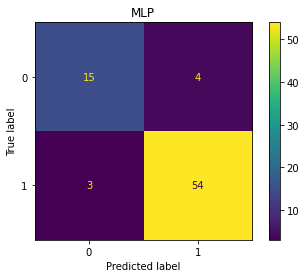

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test,mlp2_GS.best_estimator_.predict(X_test_std))
plt.title("MLP")
plt.show()

In [43]:
y_predicted = mlp2_GS.best_estimator_.predict(X_test_std)
print('accuracy:')
print(accuracy_score(y_test,y_predicted))
print('precision')
print(precision_score(y_test,y_predicted))
print('recall')
print(recall_score(y_test,y_predicted))
print('f')
print(f1_score(y_test,y_predicted))

accuracy:
0.9078947368421053
precision
0.9310344827586207
recall
0.9473684210526315
f
0.9391304347826087
